In [2]:
from process_T_phi_data import data
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm

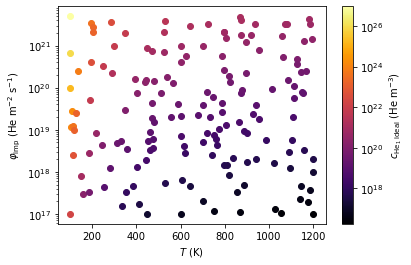

In [3]:
R_p = 1.5e-9

def D(T):
    k_B = 8.6e-5
    return 2.95e-8*np.exp(-0.13/k_B/T)
max_indicator = (float("-inf"), _)
min_indicator = (float("inf"), _)
for d in data:
    max_indicator = max(max_indicator, (d["flux"]*R_p/D(d["T"]), d))
    min_indicator = min(min_indicator, (d["flux"]*R_p/D(d["T"]), d))
min_indicator = np.log10(min_indicator[0])
max_indicator = np.log10(max_indicator[0])
colorbar = cm.inferno
for d in data:
    indicator = np.log10(d["flux"]*R_p/D(d["T"]))
    d["color"] = (indicator - min_indicator)/(max_indicator-min_indicator)
    # print((color))
    plt.scatter(d["T"], d["flux"], color=colorbar(d["color"]))
plt.yscale("log")
sm = plt.cm.ScalarMappable(cmap=colorbar, norm=LogNorm(vmin=10**min_indicator, vmax=10**max_indicator))
plt.colorbar(sm, label="$c_{\mathrm{He_1 \; ideal}}$ (He m$^{-3}$)")
plt.xlabel("$T$ (K)")
plt.ylabel(r"$\varphi_\mathrm{imp}$ (He m$^{-2}$ s$^{-1}$)")
plt.savefig("Figures/points_with_parameter.svg")
plt.savefig("Figures/points_with_parameter.pdf")
plt.show()

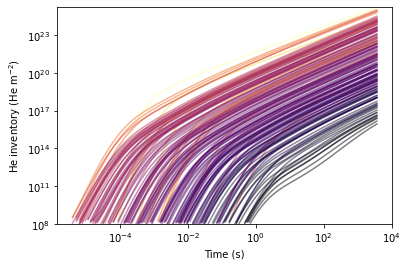

In [4]:
min_inv = 1e8
for d in data:
    indexes = np.where(d["inventory"] > min_inv)
    t = d["t"][indexes]
    inv = d['inventory'][indexes]

    plt.plot(t, inv, alpha=0.5, color=colorbar(d["color"]))

# plt.colorbar(sm)
plt.ylim(bottom=min_inv)
plt.xlabel("Time (s)")
plt.ylabel(r"He inventory (He m$^{-2}$)")
plt.yscale("log")
plt.xscale("log")
plt.savefig("Figures/inventory_time.svg")
plt.savefig("Figures/inventory_time.pdf")
plt.show()

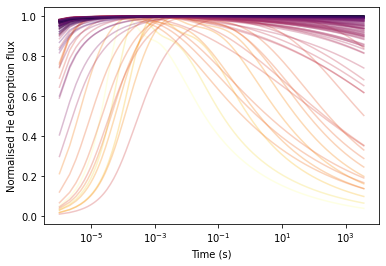

In [5]:
for d in data:
    plt.plot(d["t"], -d['surface_flux']/(max(-d['surface_flux'])), alpha=0.3, color=colorbar(d["color"]))

# plt.colorbar(sm)
plt.xlabel("Time (s)")
plt.ylabel(r"Normalised He desorption flux") # (He m$^{-2}$ s$^{-1}$)
plt.xscale("log")
# plt.yscale("log")
plt.savefig("Figures/desorption_flux_time.svg")
plt.savefig("Figures/desorption_flux_time.pdf")
plt.show()

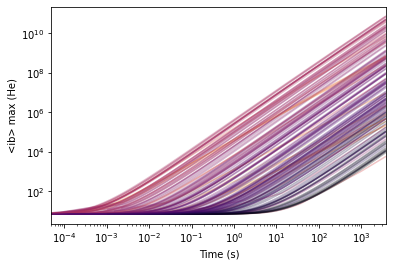

In [6]:
for d in data:
    indexes = np.where(d['x_max_ib'] < 8e-9)
    plt.plot(d["t"][indexes], d['max_ib'][indexes], alpha=0.3, color=colorbar(d["color"]))
plt.xlabel("Time (s)")
plt.ylabel(r"<ib> max (He)")
plt.xlim(left=5e-5)
plt.yscale("log")
plt.xscale("log")
plt.savefig("Figures/max_ib_time.svg")
plt.savefig("Figures/max_ib_time.pdf")
plt.show()

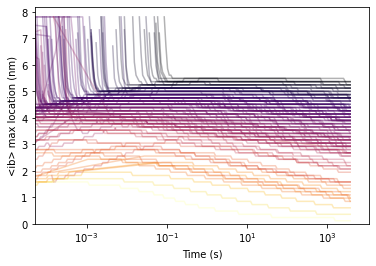

In [7]:
for d in data:
    indexes = np.where(d['x_max_ib'] < 8e-9)
    plt.plot(d["t"][indexes], d['x_max_ib'][indexes]*1e9, alpha=0.3, color=colorbar(d["color"]))
plt.xlabel("Time (s)")
plt.ylabel(r"<ib> max location (nm)")
plt.xscale("log")
plt.xlim(left=5e-5)
plt.ylim(bottom=0)
plt.savefig("Figures/x_max_ib_time.svg")
plt.savefig("Figures/x_max_ib_time.pdf")
plt.show()

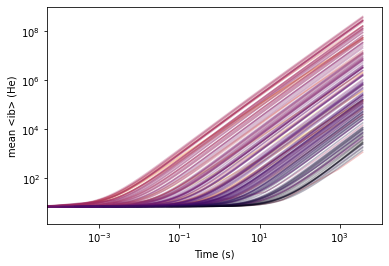

In [8]:
for d in data:
    indexes = np.where(d['x_max_ib'] < 8e-9)
    plt.plot(d["t"][indexes], d['mean_ib'][indexes], alpha=0.3, color=colorbar(d["color"]))
plt.xlabel("Time (s)")
plt.ylabel(r"mean <ib> (He)")
plt.xscale("log")
plt.yscale("log")
plt.xlim(left=5e-5)
# plt.ylim(bottom=0, top=10)
plt.savefig("Figures/mean_ib_time.svg")
plt.savefig("Figures/mean_ib_time.pdf")
plt.show()

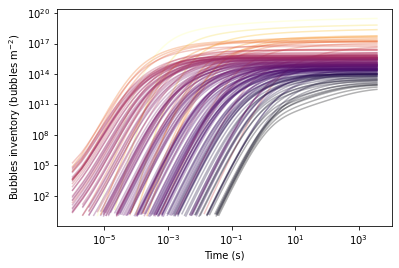

In [19]:
for d in data:
    indexes = np.where(d['total_bubbles'] > 1)
    plt.plot(d["t"][indexes], d['total_bubbles'][indexes], alpha=0.3, color=colorbar(d["color"]))
plt.xlabel("Time (s)")
plt.ylabel(r"Bubbles inventory (bubbles m$^{-2}$)")
plt.xscale("log")
plt.yscale("log")
# plt.xlim(left=5e-5)
# plt.ylim(bottom=0, top=10)
plt.savefig("Figures/total_bubbles_time.svg")
plt.savefig("Figures/total_bubbles_time.pdf")
plt.show()

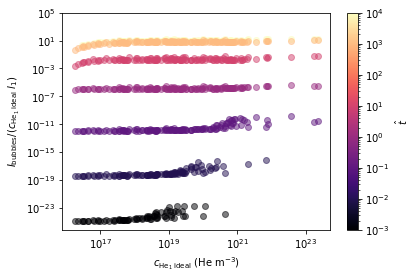

In [162]:
R1 = 3e-10

def D(T):
    k_B = 8.6e-5
    return 2.95e-8*np.exp(-0.13/k_B/T)

# times = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e3]
times_no_dim = [1e4, 1e3, 1e1, 1e0, 1e-1, 1e-2, 1e-3]
series_x = [[] for t in times_no_dim]
series_y = [[] for t in times_no_dim]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for d in data:
    if d["T"] > 200:
        for i, time_no_dimension in enumerate(times_no_dim):
            K_1_1 = 4*np.pi*(2*R1)*(2*D(d["T"]))
            c_He1_ideal = d["flux"]*R_p/D(d["T"])
            l_1 = 1/(4*np.pi*R1*c_He1_ideal)**0.5
            time = time_no_dimension / K_1_1 / c_He1_ideal
            # print(time_no_dimension, time)
            try:
                total_bubbles = d['total_bubbles_interp'](time)/c_He1_ideal/l_1
                series_x[i].append(c_He1_ideal)
                series_y[i].append(total_bubbles)
            except ValueError:
                pass
colorbar = cm.magma
for (i, (x, y, t)) in enumerate(zip(series_x, series_y, times_no_dim)):
    label = "$\hat{t} = $" + "{:.0e}".format(t)
    color = (np.log10(t) - min(np.log10(times_no_dim)))/(max(np.log10(times_no_dim))-min(np.log10(times_no_dim)))
    plt.scatter(x, y, color=colorbar(color), label=label, alpha=0.5)
    # plt.annotate(label, (min(x) * 0.01, y[0]), color=colorbar(color*10))


plt.xscale("log")
plt.yscale("log")
# plt.hlines(10, 1e17, 1e27)
# plt.xlim(left=1e14)
plt.ylim(top=1e5)

sm = plt.cm.ScalarMappable(cmap=colorbar, norm=LogNorm(vmin=10**min(np.log10(times_no_dim)), vmax=10**max(np.log10(times_no_dim))))
plt.colorbar(sm, label="$\hat{t}$")
plt.xlabel("$c_{\mathrm{He_1 \; ideal}}$ (He m$^{-3}$)")
plt.ylabel("$I_\mathrm{bubbles} / (c_{\mathrm{He_1 \; ideal}} \; l_1) $")
# plt.legend()
plt.show()

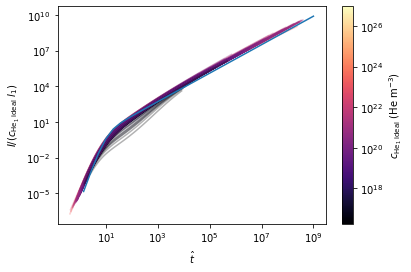

In [327]:
for d in data:
    if d["T"] > 200:
        indexes = np.where(d['total_bubbles'] > 1e8)
        K_1_1 = 4*np.pi*(2*R1)*(2*D(d["T"]))
        c_He1_ideal = d["flux"]*R_p/D(d["T"])
        l_1 = 1/(4*np.pi*R1*c_He1_ideal)**0.5
        t = d["t"][indexes] * K_1_1 * c_He1_ideal
        inventory = d["inventory"][indexes]/c_He1_ideal/l_1
        plt.plot(t, inventory, alpha=0.3, color=colorbar(d["color"]))



# fit for inventory adimensionalised
a = 2
b = 6
t_c = 10
ratio = 0.4

t = np.logspace(-5, 9)

inv = a*(t/t_c)**b/((1 + (t/t_c)**2)**(b*ratio))
plt.plot(t[np.where(t > 1e0)], inv[np.where(t > 1e0)])

sm = plt.cm.ScalarMappable(cmap=colorbar, norm=LogNorm(vmin=10**min_indicator, vmax=10**max_indicator))
plt.colorbar(sm, label="$c_{\mathrm{He_1 \; ideal}}$ (He m$^{-3}$)")
plt.xlabel("$\hat{t}$")
plt.ylabel("$I / (c_{\mathrm{He_1 \; ideal}} \; l_1) $")
plt.xscale("log")
plt.yscale("log")
# plt.legend()


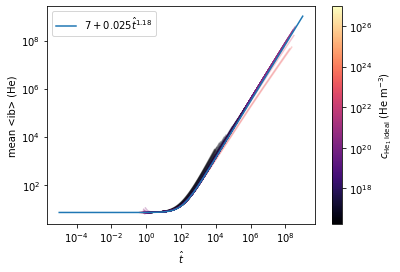

In [276]:
for d in data:
    if d["T"] > 200:
        indexes = np.where(d['total_bubbles'] > 1e8)
        K_1_1 = 4*np.pi*(2*R1)*(2*D(d["T"]))
        c_He1_ideal = d["flux"]*R_p/D(d["T"])
        l_1 = 1/(4*np.pi*R1*c_He1_ideal)**0.5
        t = d["t"][indexes] * K_1_1 * c_He1_ideal
        plt.plot(t, d["mean_ib"][indexes], alpha=0.3, color=colorbar(d["color"]))

# fit for mean ib adimensionalised
t = np.logspace(-5, 9)
ib = 7 + 0.025*t**1.18
plt.plot(t, ib, label="$7 + 0.025 \hat{t}^{1.18}$")

sm = plt.cm.ScalarMappable(cmap=colorbar, norm=LogNorm(vmin=10**min_indicator, vmax=10**max_indicator))
plt.colorbar(sm, label="$c_{\mathrm{He_1 \; ideal}}$ (He m$^{-3}$)")
plt.xlabel("$\hat{t}$")
plt.ylabel(r"mean <ib> (He)")
plt.xscale("log")
plt.yscale("log")
plt.legend()

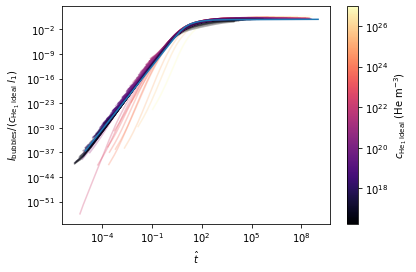

In [328]:
for d in data:
    if d["T"] > 0:
        indexes = np.where(d['total_bubbles'] > 0)
        K_1_1 = 4*np.pi*(2*R1)*(2*D(d["T"]))
        c_He1_ideal = d["flux"]*R_p/D(d["T"])
        l_1 = 1/(4*np.pi*R1*c_He1_ideal)**0.5
        t = d["t"][indexes] * K_1_1 * c_He1_ideal
        inv_bubble = d['total_bubbles'][indexes]/c_He1_ideal/l_1
        plt.plot(t, inv_bubble, alpha=0.3, color=colorbar(d["color"]))

# fit for I bubbles adimensionalised
t = np.logspace(-5, 9)

bubbles_fit = inv/ib
plt.plot(t, bubbles_fit)

sm = plt.cm.ScalarMappable(cmap=colorbar, norm=LogNorm(vmin=10**min_indicator, vmax=10**max_indicator))
plt.colorbar(sm, label="$c_{\mathrm{He_1 \; ideal}}$ (He m$^{-3}$)")
plt.xlabel("$\hat{t}$")
plt.ylabel("$I_\mathrm{bubbles} / (c_{\mathrm{He_1 \; ideal}} \; l_1) $")
plt.xscale("log")
plt.yscale("log")

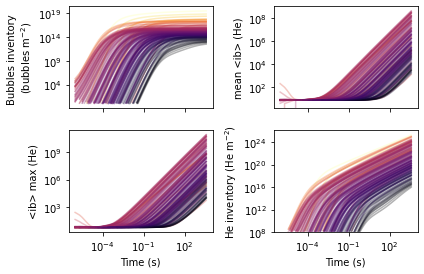

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex="col")

for d in data:
    indexes = np.where(d['total_bubbles'] > 1)
    ax1.loglog(d["t"][indexes], d['total_bubbles'][indexes], alpha=0.3, color=colorbar(d["color"]))
    ax1.set_ylabel("Bubbles inventory \n" r"(bubbles m$^{-2}$)")
for d in data:
    indexes = np.where(d['x_max_ib'] < 8e-9)
    ax2.loglog(d["t"][indexes], d['mean_ib'][indexes], alpha=0.3, color=colorbar(d["color"]))
    ax2.set_ylabel(r"mean <ib> (He)")

for d in data:
    indexes = np.where(d['x_max_ib'] < 8e-9)
    ax3.loglog(d["t"][indexes], d['max_ib'][indexes], alpha=0.3, color=colorbar(d["color"]))
    ax3.set_ylabel(r"<ib> max (He)")

min_inv = 1e8
for d in data:
    indexes = np.where(d["inventory"] > min_inv)
    t = d["t"][indexes]
    inv = d['inventory'][indexes]
    ax4.loglog(t, inv, alpha=0.3, color=colorbar(d["color"]))
    ax4.set_ylabel(r"He inventory (He m$^{-2}$)")
ax4.set_ylim(bottom=min_inv)

for ax in [ax3, ax4]:
    ax.set_xlabel("Time (s)")

fig.tight_layout()
plt.savefig("Figures/time_dependent_bubbles_quantities.svg")
plt.savefig("Figures/time_dependent_bubbles_quantities.pdf")
plt.show()

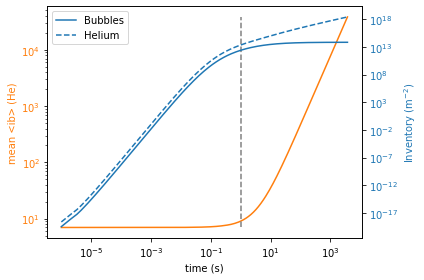

In [12]:
# d = data[5]
for d in data:
    if len(d["t"][np.where(d['mean_ib'] > 9)]) > 0:
        if 1e-1 < d["t"][np.where(d['mean_ib'] > 9)][0] < 1e1:
            break
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('time (s)')
ax1.set_ylabel(r"mean <ib> (He)", color=color)
ax1.plot(d["t"], d['mean_ib'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r"Inventory (m$^{-2}$)", color=color)  # we already handled the x-label with ax1
ax2.plot(d["t"], d['total_bubbles'], color=color, label="Bubbles")
ax2.plot(d["t"], d['inventory'], color=color, label="Helium", linestyle="dashed")
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(bottom=1e5)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.legend()

plt.vlines(d["t"][np.where(d['mean_ib'] > 9)][0], d['inventory'].min()*0.1, d['inventory'].max(), linestyle="dashed", color="grey")

# ax1.spines["top"].set_visible(False)
# ax2.spines["top"].set_visible(False) 

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Figures/inventory_bubbles_ib_bis.svg")
plt.savefig("Figures/inventory_bubbles_ib_bis.pdf")
plt.show()

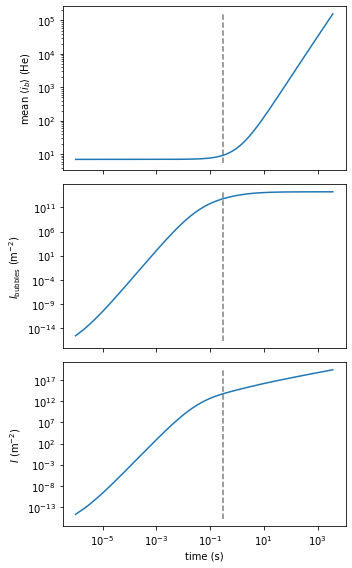

In [146]:
# d = data[5]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(5, 8))

ax1.set_ylabel(r"mean $\langle i_b \rangle$ (He)")
ax1.plot(d["t"], d['mean_ib'])
ax1.set_xscale("log")
ax1.set_yscale("log")
# ax1.text(1e-5, 1e2, "mean <ib>")

ax2.set_ylabel(r"$I_\mathrm{bubbles}$ (m$^{-2}$)")
ax2.plot(d["t"], d['total_bubbles'])
ax2.set_xscale("log")
ax2.set_yscale("log")
# ax2.text(1e-5, 1e0, "Bubbles \n inventory")

ax3.plot(d["t"], d['inventory'])

ax3.set_xlabel('time (s)')
ax3.set_ylabel(r"$I$ (m$^{-2}$)")
ax3.set_xscale("log")
ax3.set_yscale("log")
# ax3.text(1e-5, 1e0, "Helium \n inventory")

xline = d["t"][np.where(d['mean_ib'] > 9)][0]
ax1.vlines(xline, d['mean_ib'].min()*0.8, d['mean_ib'].max(), linestyle="dashed", color="grey")
ax2.vlines(xline, d['total_bubbles'].min()*0.1, d['total_bubbles'].max(), linestyle="dashed", color="grey")
ax3.vlines(xline, d['inventory'].min()*0.1, d['inventory'].max(), linestyle="dashed", color="grey")


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Figures/inventory_bubbles_ib.svg")
plt.savefig("Figures/inventory_bubbles_ib.pdf")
plt.show()